In [234]:
print("Hello World!")

Hello World!


In [235]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import VAR



In [236]:
historical_data_punjab=pd.read_csv("C:\Desktop\Smart Irrigation System\Punjab, India\PUNJAB_2_open-meteo-31.39N75.93E285m.csv")

In [237]:
historical_data_punjab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                35064 non-null  object 
 1   temperature_2m (°C)                 35064 non-null  float64
 2   relative_humidity_2m (%)            35064 non-null  int64  
 3   precipitation (mm)                  35064 non-null  float64
 4   et0_fao_evapotranspiration (mm)     35064 non-null  float64
 5   wind_speed_10m (km/h)               35064 non-null  float64
 6   soil_temperature_28_to_100cm (°C)   35064 non-null  float64
 7   soil_moisture_28_to_100cm (m³/m³)   35064 non-null  float64
 8   shortwave_radiation_instant (W/m²)  35064 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.4+ MB


In [238]:

# Convert timestamp to datetime
historical_data_punjab['timestamp'] = pd.to_datetime(historical_data_punjab['time'])

# Extract date
historical_data_punjab['date'] = historical_data_punjab['timestamp'].dt.date

# Aggregate to daily data
historical_data_punjab_daily = historical_data_punjab.groupby('date').agg({
    'temperature_2m (°C)': 'mean',
    'relative_humidity_2m (%)': 'mean',
    'precipitation (mm)': 'sum',
    'et0_fao_evapotranspiration (mm)': 'sum',
    'wind_speed_10m (km/h)': 'mean',
    'soil_temperature_28_to_100cm (°C)': 'mean',
    'soil_moisture_28_to_100cm (m³/m³)': 'mean',
    'shortwave_radiation_instant (W/m²)': 'sum'
}).reset_index()


In [239]:
future_data_punjab = pd.read_csv(r"C:\Desktop\Smart Irrigation System\future_data_punjab_open-meteo-31.39N75.93E285m.csv")


In [240]:
future_data_punjab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4081 entries, 0 to 4080
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   time                                4081 non-null   object 
 1   temperature_2m (°C)                 4081 non-null   float64
 2   relative_humidity_2m (%)            4081 non-null   int64  
 3   precipitation (mm)                  4081 non-null   float64
 4   et0_fao_evapotranspiration (mm)     4081 non-null   float64
 5   wind_speed_10m (km/h)               4081 non-null   float64
 6   soil_temperature_28_to_100cm (°C)   4081 non-null   float64
 7   soil_moisture_28_to_100cm (m³/m³)   4081 non-null   float64
 8   shortwave_radiation_instant (W/m²)  4081 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 287.1+ KB


In [241]:

# Convert timestamp to datetime
future_data_punjab['timestamp'] = pd.to_datetime(future_data_punjab['time'])

# Extract date
future_data_punjab['date'] = future_data_punjab['timestamp'].dt.date

# Aggregate to daily data
future_data_punjab_daily = future_data_punjab.groupby('date').agg({
    'temperature_2m (°C)': 'mean',
    'relative_humidity_2m (%)': 'mean',
    'precipitation (mm)': 'sum',
    'et0_fao_evapotranspiration (mm)': 'sum',
    'wind_speed_10m (km/h)': 'mean',
    'soil_temperature_28_to_100cm (°C)': 'mean',
    'soil_moisture_28_to_100cm (m³/m³)': 'mean',
    'shortwave_radiation_instant (W/m²)': 'sum'
}).reset_index()


In [242]:
future_data_punjab_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                171 non-null    object 
 1   temperature_2m (°C)                 171 non-null    float64
 2   relative_humidity_2m (%)            171 non-null    float64
 3   precipitation (mm)                  171 non-null    float64
 4   et0_fao_evapotranspiration (mm)     171 non-null    float64
 5   wind_speed_10m (km/h)               171 non-null    float64
 6   soil_temperature_28_to_100cm (°C)   171 non-null    float64
 7   soil_moisture_28_to_100cm (m³/m³)   171 non-null    float64
 8   shortwave_radiation_instant (W/m²)  171 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.2+ KB


In [243]:
# Concatenate the DataFrames
combined_historical_data_punjab_daily = pd.concat([historical_data_punjab_daily, future_data_punjab_daily], ignore_index=True)


In [244]:
combined_historical_data_punjab_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1632 entries, 0 to 1631
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                1632 non-null   object 
 1   temperature_2m (°C)                 1632 non-null   float64
 2   relative_humidity_2m (%)            1632 non-null   float64
 3   precipitation (mm)                  1632 non-null   float64
 4   et0_fao_evapotranspiration (mm)     1632 non-null   float64
 5   wind_speed_10m (km/h)               1632 non-null   float64
 6   soil_temperature_28_to_100cm (°C)   1632 non-null   float64
 7   soil_moisture_28_to_100cm (m³/m³)   1632 non-null   float64
 8   shortwave_radiation_instant (W/m²)  1632 non-null   float64
dtypes: float64(8), object(1)
memory usage: 114.9+ KB


In [245]:
# Rename ET₀ column for easier reference
combined_historical_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)

In [246]:
 #Set the date column as the index
combined_historical_data_punjab_daily.set_index('date', inplace=True)
# Ensure the index is in datetime format
combined_historical_data_punjab_daily.index = pd.to_datetime(combined_historical_data_punjab_daily.index)



## Examine Historical Soil Moisture Data


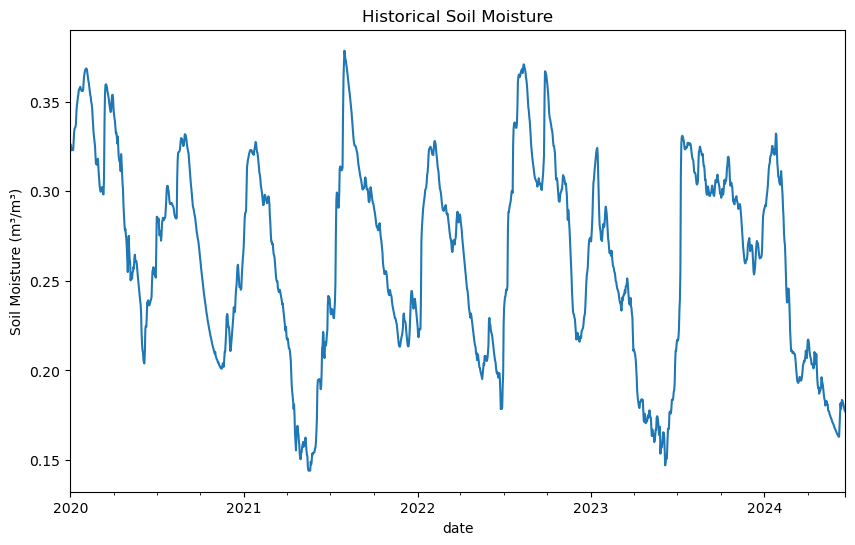

count    1632.000000
mean        0.263451
std         0.055661
min         0.144000
25%         0.218219
50%         0.269792
75%         0.306469
max         0.378458
Name: soil_moisture_28_to_100cm (m³/m³), dtype: float64

In [247]:
# Plot historical soil moisture data
combined_historical_data_punjab_daily['soil_moisture_28_to_100cm (m³/m³)'].plot(figsize=(10, 6), title='Historical Soil Moisture')
plt.ylabel('Soil Moisture (m³/m³)')
plt.show()

# Describe the soil moisture data
combined_historical_data_punjab_daily['soil_moisture_28_to_100cm (m³/m³)'].describe()



## Calculate Lagged Soil Moisture


In [248]:
# Calculate lagged soil moisture (1 day lag)
##combined_historical_data_punjab_daily['soil_moisture_lag1'] = combined_historical_data_punjab_daily['soil_moisture_28_to_100cm (m³/m³)'].shift(1)

# Drop any rows with missing values
combined_historical_data_punjab_daily.dropna(inplace=True)


In [249]:
combined_historical_data_punjab_daily_save=combined_historical_data_punjab_daily.copy()

In [250]:
#wheat_punjab.drop(columns=["crop", "soil_moisture_28_to_100cm (m³/m³)"], inplace=True)
# Dropping the specified columns
#wheat_punjab = wheat_punjab.drop(columns=['Kc', 'ETc (mm)'])


## Integrating Lagged Soil Moisture into the Forecast Model


In [251]:
#Ensure dataset includes the lagged soil moisture 
combined_historical_data_punjab_daily.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'precipitation (mm)',
       'ET₀ (mm)', 'wind_speed_10m (km/h)',
       'soil_temperature_28_to_100cm (°C)',
       'soil_moisture_28_to_100cm (m³/m³)',
       'shortwave_radiation_instant (W/m²)'],
      dtype='object')

## Check Stationarity and Differencing


In [252]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(timeseries):
    result = adfuller(timeseries.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] < 0.05:
        print("The series is stationary")
    else:
        print("The series is not stationary, differencing needed")

# Check for each column in the dataset
for column in combined_historical_data_punjab_daily.columns:
    print(f'Checking stationarity for {column}')
    check_stationarity(combined_historical_data_punjab_daily[column])

# Apply differencing if needed
combined_historical_data_punjab_daily_diff = combined_historical_data_punjab_daily.diff().dropna()

# Re-check stationarity after differencing
for column in combined_historical_data_punjab_daily_diff.columns:
    print(f'Checking stationarity for differenced {column}')
    check_stationarity(combined_historical_data_punjab_daily_diff[column])



Checking stationarity for temperature_2m (°C)


ADF Statistic: -2.3314193406063763
p-value: 0.16203471430990163
The series is not stationary, differencing needed
Checking stationarity for relative_humidity_2m (%)
ADF Statistic: -3.2854185118543158
p-value: 0.015542982892423668
The series is stationary
Checking stationarity for precipitation (mm)
ADF Statistic: -19.312402740163133
p-value: 0.0
The series is stationary
Checking stationarity for ET₀ (mm)
ADF Statistic: -2.812728027026543
p-value: 0.056478535122930426
The series is not stationary, differencing needed
Checking stationarity for wind_speed_10m (km/h)
ADF Statistic: -4.437334127371383
p-value: 0.00025478769229093587
The series is stationary
Checking stationarity for soil_temperature_28_to_100cm (°C)
ADF Statistic: -4.30755172601242
p-value: 0.0004310249637016844
The series is stationary
Checking stationarity for soil_moisture_28_to_100cm (m³/m³)
ADF Statistic: -4.430771020468634
p-value: 0.00026174426704823135
The series is stationary
Checking stationarity for shortwave_rad

## Fitting Vector Autoregresion (VAR) Time series Model


In [253]:
""""Using this because it take multiple variables simultaneously"""

'"Using this because it take multiple variables simultaneously'

In [262]:
## Fit the VAR model to the differenced data.
# Fit the VAR model
model = VAR(combined_historical_data_punjab_daily_diff)
model_fit = model.fit(maxlags=15, ic='aic')

# Summary of the model
model_fit.summary()


c:\Users\godwi\Downloads\Anconda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 23, Jun, 2024
Time:                     12:27:20
--------------------------------------------------------------------
No. of Equations:         8.00000    BIC:                    2.10760
Nobs:                     1621.00    HQIC:                  0.752309
Log likelihood:          -17714.4    FPE:                   0.954355
AIC:                   -0.0473856    Det(Omega_mle):        0.646097
--------------------------------------------------------------------
Results for equation temperature_2m (°C)
                                            coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------------
const                                          0.017753         0.028905            0.614           0.539
L1.temperature_2m (°C)                         0.063

##  Forecast Future Values

In [263]:

# Forecast the next 16 days
forecast_steps = 16
lag_order = model_fit.k_ar
forecast_diff = model_fit.forecast(y=combined_historical_data_punjab_daily_diff.values[-lag_order:], steps=forecast_steps)

# Create a DataFrame for the forecasted differenced values
forecast_dates = pd.date_range(start=combined_historical_data_punjab_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecasted_diff_df = pd.DataFrame(data=forecast_diff, index=forecast_dates, columns=combined_historical_data_punjab_daily_diff.columns)

# Reverse the differencing to get the actual forecasted values
# Get the last value from the original data
last_values = combined_historical_data_punjab_daily.iloc[-1]

# Initialize the DataFrame for the actual forecasted values
forecasted_values_df = forecasted_diff_df.cumsum() + last_values



## Time Series Model Evaluation 

In [264]:

from sklearn.metrics import mean_absolute_error, mean_squared_error# Forecast the next 16 days
forecast_steps = 16
lag_order = model_fit.k_ar
forecast_diff = model_fit.forecast(y=combined_historical_data_punjab_daily_diff.values[-lag_order:], steps=forecast_steps)

# Create a DataFrame for the forecasted differenced values
forecast_dates = pd.date_range(start=combined_historical_data_punjab_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecasted_diff_df = pd.DataFrame(data=forecast_diff, index=forecast_dates, columns=combined_historical_data_punjab_daily_diff.columns)

# Reverse the differencing to get the actual forecasted values
# Get the last value from the original data
last_values = combined_historical_data_punjab_daily.iloc[-1]

# Initialize the DataFrame for the actual forecasted values
forecasted_values_df = forecasted_diff_df.cumsum() + last_values

# Evaluate the forecasted values against the test set
test = combined_historical_data_punjab_daily[-forecast_steps:]  # Take the last 16 days from your actual data for evaluation

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecasted_values_df)
mse = mean_squared_error(test, forecasted_values_df)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plotting with Plotly or other preferred visualization library
# Ensure that the plot includes both actual and forecasted values for the evaluation period
# Example plot code goes here


MAE: 210.39541490024214
MSE: 458806.879823116
RMSE: 677.3528473573548


In [265]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Assuming test and forecasted_values_df are your actual and predicted data
mae = mean_absolute_error(test, forecasted_values_df)
mse = mean_squared_error(test, forecasted_values_df)
rmse = np.sqrt(mse)

# Calculate means
mean_actual = test.mean()
mean_forecasted = forecasted_values_df.mean()

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'Mean Actual: \n{mean_actual}')
print(f'Mean Forecasted: \n{mean_forecasted}')

# Compare RMSE with Mean Actual Values
mean_actual_value = mean_actual.mean()  # Overall mean of actual values
if rmse < mean_actual_value:
    print(f"RMSE ({rmse}) is less than the mean actual value ({mean_actual_value}). The model performs well.")
else:
    print(f"RMSE ({rmse}) is not less than the mean actual value ({mean_actual_value}). The model may not perform well.")


MAE: 210.39541490024214
MSE: 458806.879823116
RMSE: 677.3528473573548
Mean Actual: 
temperature_2m (°C)                     34.629688
relative_humidity_2m (%)                25.651042
precipitation (mm)                       0.018750
ET₀ (mm)                                 7.446250
wind_speed_10m (km/h)                    9.854948
soil_temperature_28_to_100cm (°C)       31.487500
soil_moisture_28_to_100cm (m³/m³)        0.176115
shortwave_radiation_instant (W/m²)    5777.612500
dtype: float64
Mean Forecasted: 
temperature_2m (°C)                     34.844978
relative_humidity_2m (%)                26.361987
precipitation (mm)                       4.316609
ET₀ (mm)                                 6.152750
wind_speed_10m (km/h)                    9.798700
soil_temperature_28_to_100cm (°C)       31.682939
soil_moisture_28_to_100cm (m³/m³)        0.179610
shortwave_radiation_instant (W/m²)    4799.397427
dtype: float64
RMSE (677.3528473573548) is less than the mean actual value (735.859

In [266]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Forecast the next 16 days
forecast_steps = 16
lag_order = model_fit.k_ar
forecast_diff = model_fit.forecast(y=combined_historical_data_punjab_daily_diff.values[-lag_order:], steps=forecast_steps)

# Create a DataFrame for the forecasted differenced values
forecast_dates = pd.date_range(start=combined_historical_data_punjab_daily.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
forecasted_diff_df = pd.DataFrame(data=forecast_diff, index=forecast_dates, columns=combined_historical_data_punjab_daily_diff.columns)

# Reverse the differencing to get the actual forecasted values
last_values = combined_historical_data_punjab_daily.iloc[-1]
forecasted_values_df = forecasted_diff_df.cumsum() + last_values

# Evaluate the forecasted values against the test set
test = combined_historical_data_punjab_daily[-forecast_steps:]  # Take the last 16 days from your actual data for evaluation

# Calculate accuracy metrics
mae = mean_absolute_error(test, forecasted_values_df)
mse = mean_squared_error(test, forecasted_values_df)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

# Plotting with Plotly
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=('Actual vs. Forecasted Temperature', 'Residual Histogram'))

# Actual vs. Forecasted Temperature
fig.add_trace(go.Scatter(x=test.index, y=test['temperature_2m (°C)'], mode='lines', name='Actual'), row=1, col=1)
fig.add_trace(go.Scatter(x=forecasted_values_df.index, y=forecasted_values_df['temperature_2m (°C)'], mode='lines', name='Forecasted'), row=1, col=1)

# Residual Histogram (you can skip this if not needed)
residuals = test['temperature_2m (°C)'] - forecasted_values_df['temperature_2m (°C)']
fig.add_trace(go.Histogram(x=residuals, nbinsx=30, name='Residuals'), row=2, col=1)

# Update layout
fig.update_layout(title='Forecast Evaluation',
                  xaxis_title='Date',
                  height=800,
                  showlegend=True)

# Show plot
fig.show()


MAE: 210.39541490024214
MSE: 458806.879823116
RMSE: 677.3528473573548


In [267]:
forecasted_values_df

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),shortwave_radiation_instant (W/m²)
2024-06-20,33.939738,33.440031,12.144678,4.857347,10.794353,31.907449,0.179615,3644.670670
2024-06-21,34.910862,26.917579,5.888071,5.870090,8.426980,31.793217,0.181702,4682.856981
2024-06-22,34.430147,27.267391,6.615128,5.936763,9.034734,31.748982,0.179751,4664.165546
2024-06-23,35.050830,22.683589,0.483762,6.496568,10.492451,31.725610,0.181552,4891.574201
2024-06-24,34.815874,25.086820,6.535490,6.344911,9.469318,31.694330,0.180640,4778.714917
2024-06-25,34.993913,25.023277,5.877203,6.839050,12.343472,31.695599,0.180662,5141.739515
2024-06-26,34.274944,27.900511,1.178550,6.233392,9.303787,31.653585,0.182470,5090.355580
2024-06-27,34.383490,24.789408,3.943051,6.457748,9.838558,31.620883,0.180368,5472.197959
2024-06-28,33.784255,29.106423,7.243356,5.587420,9.550192,31.595218,0.179670,4531.520187
2024-06-29,35.748349,24.087362,-3.911261,7.285765,7.903344,31.544611,0.179790,6038.973098


In [268]:
# Combine the historical and forecasted data
historical_data_with_forcast_data = pd.concat([combined_historical_data_punjab_daily, forecasted_values_df])

In [269]:
historical_data_with_forcast_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2020-01-01 to 2024-07-05
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m (°C)                 1648 non-null   float64
 1   relative_humidity_2m (%)            1648 non-null   float64
 2   precipitation (mm)                  1648 non-null   float64
 3   ET₀ (mm)                            1648 non-null   float64
 4   wind_speed_10m (km/h)               1648 non-null   float64
 5   soil_temperature_28_to_100cm (°C)   1648 non-null   float64
 6   soil_moisture_28_to_100cm (m³/m³)   1648 non-null   float64
 7   shortwave_radiation_instant (W/m²)  1648 non-null   float64
dtypes: float64(8)
memory usage: 115.9 KB


In [270]:
 
# Rename ET₀ column for easier reference
future_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)#Set the date column as the index
future_data_punjab_daily.set_index('date', inplace=True)
# Ensure the index is in datetime format
future_data_punjab_daily.index = pd.to_datetime(future_data_punjab_daily.index)
# Rename ET₀ column for easier reference
future_data_punjab_daily.rename(columns={'et0_fao_evapotranspiration (mm)': 'ET₀ (mm)'}, inplace=True)

In [271]:
# Combine the historical and forecasted data
present_data_with_forecast_data = pd.concat([future_data_punjab_daily, forecasted_values_df])
# Save the combined data to a new CSV file if needed
present_data_with_forecast_data.to_csv(r"C:\Desktop\Smart Irrigation System\present_data_with_forecast_data.csv")



In [272]:
present_data_with_forecast_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 2024-01-01 to 2024-07-05
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   temperature_2m (°C)                 187 non-null    float64
 1   relative_humidity_2m (%)            187 non-null    float64
 2   precipitation (mm)                  187 non-null    float64
 3   ET₀ (mm)                            187 non-null    float64
 4   wind_speed_10m (km/h)               187 non-null    float64
 5   soil_temperature_28_to_100cm (°C)   187 non-null    float64
 6   soil_moisture_28_to_100cm (m³/m³)   187 non-null    float64
 7   shortwave_radiation_instant (W/m²)  187 non-null    float64
dtypes: float64(8)
memory usage: 13.1 KB


In [273]:
present_data_with_forecast_data.tail(20)

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),soil_moisture_28_to_100cm (m³/m³),shortwave_radiation_instant (W/m²)
2024-06-16,36.641667,26.916667,0.000000,8.120000,9.229167,31.712500,0.179625,6423.600000
2024-06-17,37.862500,23.625000,0.000000,8.310000,9.812500,31.858333,0.178542,6211.100000
2024-06-18,37.162500,26.833333,0.000000,8.840000,11.866667,32.029167,0.177500,6311.600000
2024-06-19,32.200000,32.000000,0.000000,0.110000,9.000000,32.100000,0.177000,0.000000
2024-06-20,33.939738,33.440031,12.144678,4.857347,10.794353,31.907449,0.179615,3644.670670
2024-06-21,34.910862,26.917579,5.888071,5.870090,8.426980,31.793217,0.181702,4682.856981
2024-06-22,34.430147,27.267391,6.615128,5.936763,9.034734,31.748982,0.179751,4664.165546
2024-06-23,35.050830,22.683589,0.483762,6.496568,10.492451,31.725610,0.181552,4891.574201
2024-06-24,34.815874,25.086820,6.535490,6.344911,9.469318,31.694330,0.180640,4778.714917
2024-06-25,34.993913,25.023277,5.877203,6.839050,12.343472,31.695599,0.180662,5141.739515


## Model Evaluation 

In [ ]:
 #If actual future data is available, compare it with the forecast
# actual_future_data = ... # Replace with actual future data if available

# Example metrics calculation if actual future data is available
# mae = mean_absolute_error(actual_future_data, forecasted_values)
# mse = mean_squared_error(actual_future_data, forecasted_values)
# rmse = np.sqrt(mse)
# mape = np.mean(np.abs((actual_future_data - forecasted_values) / actual_future_data)) * 100

# print(f"MAE: {mae}")
# print(f"MSE: {mse}")
# print(f"RMSE: {rmse}")
# print(f"MAPE: {mape}")

## Predicting Soil Moisture based on Forecasted Weather

In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the historical soil moisture line
fig.add_trace(go.Scatter(
    x=historical_data_with_forcast_data.index, 
    y=historical_data_with_forcast_data["temperature_2m (°C)"],
    mode='lines',
    name='Historical Soil Moisture'
))

# Add the forecasted soil moisture line
fig.add_trace(go.Scatter(
    x=forecasted_values_df.index, 
    y=forecasted_values_df["temperature_2m (°C)"],
    mode='lines',
    name='Forecasted Soil Moisture',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='Soil Moisture Over Time With Prediction',
    xaxis_title='Date',
    yaxis_title='Soil Moisture (m³/m³)',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()


## Calculating Soil Deficit & Irrigation Need &   Irrigation Amount

In [ ]:
# Calculate ETc (Crop Evapotranspiration)
#future_punjab_daily_data['ETc (mm)'] = future_punjab_daily_data['ET₀ (mm)'] * future_punjab_daily_data['Kc']

# Calculate soil deficit
threshold_soil_moisture = 0.297715  # Example threshold in m³/m³ (mean of soil moisture predicted )
forecast_df['soil_deficit'] = forecast_df['ETc (mm)'] - forecast_df['precipitation (mm)']

# Define a function to calculate irrigation need
def calculate_irrigation_need(soil_moisture, threshold, soil_deficit):
    if soil_moisture < threshold:
        return max(0, threshold - soil_moisture + soil_deficit)
    return 0

# Apply the irrigation calculation to the forecasted data
forecast_df['irrigation_amount'] = forecast_df.apply(lambda row: calculate_irrigation_need(
    row['predicted_soil_moisture'], threshold_soil_moisture, row['soil_deficit']), axis=1)



KeyError: 'ETc (mm)'

In [ ]:

# Calculate irrigation need
threshold_soil_moisture = 0.297715
# Calculate soil deficit
forecast_df['soil_deficit'] = forecast_df['ETc (mm)'] - forecast_df['precipitation (mm)']
forecast_df['irrigation_need'] = forecast_df['predicted_soil_moisture'] < threshold_soil_moisture
forecast_df['irrigation_amount'] = forecast_df.apply(
    lambda row: max(0, threshold_soil_moisture - row['predicted_soil_moisture']), axis=1
)

# Display the irrigation schedule

#irrigation_schedule = forecast_df[['predicted_soil_moisture', 'soil_deficit', 'irrigation_amount']]
#print(irrigation_schedule)



# Create and display the irrigation schedule
#irrigation_schedule = forecast_df[['predicted_soil_moisture', 'irrigation_amount']]
#irrigation_schedule.tail(50)

KeyError: 'ETc (mm)'

In [ ]:
forecast_df.head(10)

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),shortwave_radiation_instant (W/m²),Kc,ETc (mm),soil_moisture_lag1,predicted_soil_moisture,soil_deficit,irrigation_amount,irrigation_need
2024-01-01,10.534892,89.860850,-4.209284,1.682507,3.888398,16.045387,3153.465532,1.105857,1.689327,0.290555,0.291299,5.898611,0.006416,True
2024-01-02,10.681555,89.235005,-5.521353,1.708329,4.052763,15.911637,3246.125842,1.121138,1.750965,0.293383,0.293769,7.272317,0.003946,True
2024-01-03,10.627414,89.655868,-3.826319,1.492196,3.695787,15.793016,2997.164757,1.126010,1.689589,0.294974,0.295605,5.515908,0.002110,True
2024-01-04,10.849708,89.726229,-2.692219,1.527685,3.917839,15.683897,2913.166313,1.131162,1.706429,0.295382,0.296276,4.398648,0.001439,True
2024-01-05,10.901024,90.068899,-3.275196,1.480019,4.371964,15.593060,2776.724707,1.134691,1.690655,0.295811,0.296760,4.965851,0.000955,True
2024-01-06,10.839845,90.302039,-3.318692,1.471850,4.121642,15.511445,2804.984092,1.137026,1.697044,0.296330,0.297263,5.015736,0.000452,True
2024-01-07,10.846616,90.001985,-3.601752,1.547278,3.916916,15.438729,2893.262893,1.137945,1.723614,0.296744,0.297600,5.325366,0.000115,True
2024-01-08,10.823232,89.740970,-3.833988,1.592365,3.998425,15.375798,2959.937332,1.140947,1.748743,0.297354,0.298115,5.582731,0.000000,False
2024-01-09,10.780873,89.574127,-3.838171,1.587331,4.100970,15.319583,2953.454187,1.143794,1.753415,0.297777,0.298505,5.591586,0.000000,False
2024-01-10,10.793374,89.326683,-3.818761,1.585486,4.014234,15.267355,2960.132503,1.145772,1.754709,0.298089,0.298776,5.573470,0.000000,False


In [ ]:
p= forecast_df[forecast_df["irrigation_need"]==True]

KeyError: 'irrigation_need'

In [ ]:
p.head(5)

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),shortwave_radiation_instant (W/m²),Kc,ETc (mm),soil_moisture_lag1,predicted_soil_moisture,soil_deficit,irrigation_amount,irrigation_need
2024-01-01,10.534892,89.860850,-4.209284,1.682507,3.888398,16.045387,3153.465532,1.105857,1.689327,0.290555,0.291299,5.898611,0.006416,True
2024-01-02,10.681555,89.235005,-5.521353,1.708329,4.052763,15.911637,3246.125842,1.121138,1.750965,0.293383,0.293769,7.272317,0.003946,True
2024-01-03,10.627414,89.655868,-3.826319,1.492196,3.695787,15.793016,2997.164757,1.126010,1.689589,0.294974,0.295605,5.515908,0.002110,True
2024-01-04,10.849708,89.726229,-2.692219,1.527685,3.917839,15.683897,2913.166313,1.131162,1.706429,0.295382,0.296276,4.398648,0.001439,True
2024-01-05,10.901024,90.068899,-3.275196,1.480019,4.371964,15.593060,2776.724707,1.134691,1.690655,0.295811,0.296760,4.965851,0.000955,True


In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the predicted soil moisture line
fig.add_trace(go.Scatter(
    x=forecast_df.index, 
    y=forecast_df["predicted_soil_moisture"],
    mode='lines',
    name='Predicted Soil Moisture',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='Predicted Soil Moisture Over Time',
    xaxis_title='Date',
    yaxis_title='Predicted Soil Moisture',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()


In [ ]:
import plotly.graph_objects as go

# Create a figure
fig = go.Figure()

# Add the irrigation amount line
fig.add_trace(go.Scatter(
    x=p.index, 
    y=p["irrigation_amount"],
    mode='lines',
    name='Irrigation Amount',
    line=dict(dash='dash')  # This creates a dashed line
))

# Update layout for the figure
fig.update_layout(
    title='Irrigation Amount Needed',
    xaxis_title='Date',
    yaxis_title='Irrigation Amount',
    legend_title='Legend',
    template='plotly_white',  # Optional: set a template
    width=900,  # Width of the plot
    height=700  # Height of the plot
)

# Show the figure
fig.show()


NameError: name 'p' is not defined

In [ ]:
# Create an irrigation schedule within the growing season of Wheat
irrigation_schedule_wheat = forecast_df[(forecast_df.index >= '2024-01-01') & 
                                              (forecast_df.index <= '2024-12-31') & 
                                              (forecast_df['irrigation_amount'] > 0)]

# Display the resulting irrigation schedule
irrigation_schedule_wheat
#w_irrigation_schedule=irrigation_schedule_wheat.reset_index(drop=True)
#w_irrigation_schedule


,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),shortwave_radiation_instant (W/m²),Kc,ETc (mm),soil_moisture_lag1,predicted_soil_moisture,soil_deficit,irrigation_amount,irrigation_need
2024-01-01,10.534892,89.860850,-4.209284,1.682507,3.888398,16.045387,3153.465532,1.105857,1.689327,0.290555,0.291299,5.898611,0.006416,True
2024-01-02,10.681555,89.235005,-5.521353,1.708329,4.052763,15.911637,3246.125842,1.121138,1.750965,0.293383,0.293769,7.272317,0.003946,True
2024-01-03,10.627414,89.655868,-3.826319,1.492196,3.695787,15.793016,2997.164757,1.126010,1.689589,0.294974,0.295605,5.515908,0.002110,True
2024-01-04,10.849708,89.726229,-2.692219,1.527685,3.917839,15.683897,2913.166313,1.131162,1.706429,0.295382,0.296276,4.398648,0.001439,True
2024-01-05,10.901024,90.068899,-3.275196,1.480019,4.371964,15.593060,2776.724707,1.134691,1.690655,0.295811,0.296760,4.965851,0.000955,True
2024-01-06,10.839845,90.302039,-3.318692,1.471850,4.121642,15.511445,2804.984092,1.137026,1.697044,0.296330,0.297263,5.015736,0.000452,True
2024-01-07,10.846616,90.001985,-3.601752,1.547278,3.916916,15.438729,2893.262893,1.137945,1.723614,0.296744,0.297600,5.325366,0.000115,True


In [ ]:
c= irrigation_schedule_wheat[irrigation_schedule_wheat["irrigation_need"]==True]

In [ ]:
c

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),shortwave_radiation_instant (W/m²),Kc,ETc (mm),soil_moisture_lag1,predicted_soil_moisture,soil_deficit,irrigation_amount,irrigation_need
2024-01-01,10.534892,89.860850,-4.209284,1.682507,3.888398,16.045387,3153.465532,1.105857,1.689327,0.290555,0.291299,5.898611,0.006416,True
2024-01-02,10.681555,89.235005,-5.521353,1.708329,4.052763,15.911637,3246.125842,1.121138,1.750965,0.293383,0.293769,7.272317,0.003946,True
2024-01-03,10.627414,89.655868,-3.826319,1.492196,3.695787,15.793016,2997.164757,1.126010,1.689589,0.294974,0.295605,5.515908,0.002110,True
2024-01-04,10.849708,89.726229,-2.692219,1.527685,3.917839,15.683897,2913.166313,1.131162,1.706429,0.295382,0.296276,4.398648,0.001439,True
2024-01-05,10.901024,90.068899,-3.275196,1.480019,4.371964,15.593060,2776.724707,1.134691,1.690655,0.295811,0.296760,4.965851,0.000955,True
2024-01-06,10.839845,90.302039,-3.318692,1.471850,4.121642,15.511445,2804.984092,1.137026,1.697044,0.296330,0.297263,5.015736,0.000452,True
2024-01-07,10.846616,90.001985,-3.601752,1.547278,3.916916,15.438729,2893.262893,1.137945,1.723614,0.296744,0.297600,5.325366,0.000115,True


In [ ]:
p.tail(50)

,temperature_2m (°C),relative_humidity_2m (%),precipitation (mm),ET₀ (mm),wind_speed_10m (km/h),soil_temperature_28_to_100cm (°C),shortwave_radiation_instant (W/m²),Kc,ETc (mm),soil_moisture_lag1,predicted_soil_moisture,soil_deficit,irrigation_amount,irrigation_need
2024-01-01,10.534892,89.860850,-4.209284,1.682507,3.888398,16.045387,3153.465532,1.105857,1.689327,0.290555,0.291299,5.898611,0.006416,True
2024-01-02,10.681555,89.235005,-5.521353,1.708329,4.052763,15.911637,3246.125842,1.121138,1.750965,0.293383,0.293769,7.272317,0.003946,True
2024-01-03,10.627414,89.655868,-3.826319,1.492196,3.695787,15.793016,2997.164757,1.126010,1.689589,0.294974,0.295605,5.515908,0.002110,True
2024-01-04,10.849708,89.726229,-2.692219,1.527685,3.917839,15.683897,2913.166313,1.131162,1.706429,0.295382,0.296276,4.398648,0.001439,True
2024-01-05,10.901024,90.068899,-3.275196,1.480019,4.371964,15.593060,2776.724707,1.134691,1.690655,0.295811,0.296760,4.965851,0.000955,True
2024-01-06,10.839845,90.302039,-3.318692,1.471850,4.121642,15.511445,2804.984092,1.137026,1.697044,0.296330,0.297263,5.015736,0.000452,True
2024-01-07,10.846616,90.001985,-3.601752,1.547278,3.916916,15.438729,2893.262893,1.137945,1.723614,0.296744,0.297600,5.325366,0.000115,True


In [ ]:
# Display the irrigation schedule

irrigation_schedule = forecast_df[['predicted_soil_moisture', 'soil_deficit', 'irrigation_amount']]
irrigation_schedule.tail(25)


,predicted_soil_moisture,soil_deficit,irrigation_amount
2024-03-06,0.299761,6.433504,0.0
2024-03-07,0.299745,6.440995,0.0
2024-03-08,0.299730,6.448479,0.0
2024-03-09,0.299714,6.455957,0.0
2024-03-10,0.299698,6.463429,0.0
2024-03-11,0.299682,6.470897,0.0
2024-03-12,0.299666,6.478361,0.0
2024-03-13,0.299650,6.485821,0.0
2024-03-14,0.299634,6.493277,0.0
2024-03-15,0.299618,6.500731,0.0


In [ ]:
irrigation_schedule.describe()

,predicted_soil_moisture,soil_deficit,irrigation_amount
count,90.000000,90.000000,90.000000
mean,0.299449,6.194993,0.000171
std,0.001341,0.404269,0.000833
min,0.291299,4.398648,0.000000
25%,0.299509,6.047901,0.000000
50%,0.299807,6.283753,0.000000
75%,0.300062,6.454087,0.000000
max,0.300176,7.272317,0.006416


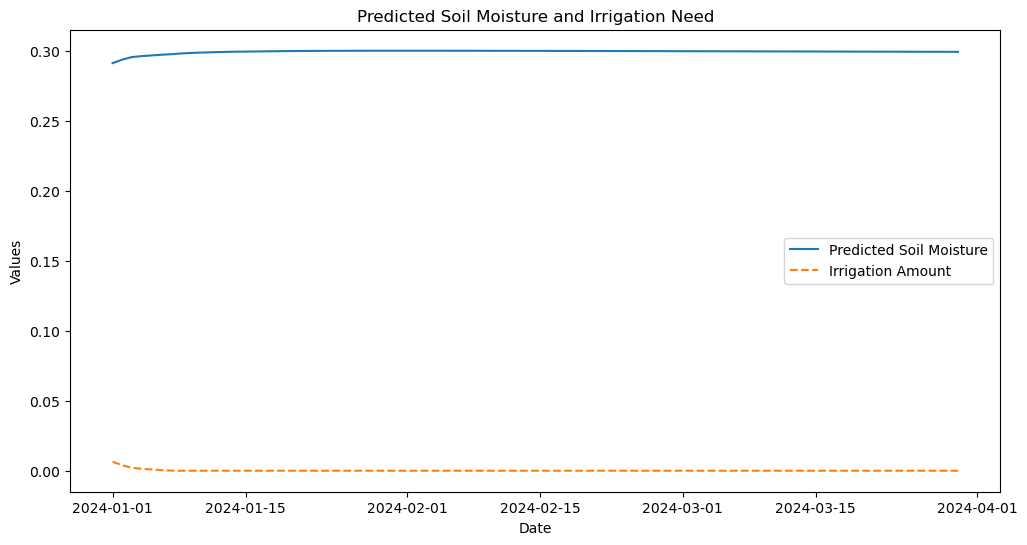

In [ ]:
# Plot the forecasted soil moisture and irrigation need
plt.figure(figsize=(12, 6))
plt.plot(irrigation_schedule.index, irrigation_schedule['predicted_soil_moisture'], label='Predicted Soil Moisture')
plt.plot(irrigation_schedule.index, irrigation_schedule['irrigation_amount'], label='Irrigation Amount', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Predicted Soil Moisture and Irrigation Need')
plt.legend()
plt.show()